In [1]:
import pandas as pd
import numpy as np

##### Collecting The Data

In [2]:
mcdonalds=pd.read_csv("mcdonalds.csv")
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


##### Data Exploration

In [3]:
mcdonalds.shape

(1453, 15)

In [4]:
mcdonalds.dtypes

yummy             object
convenient        object
spicy             object
fattening         object
greasy            object
fast              object
cheap             object
tasty             object
expensive         object
healthy           object
disgusting        object
Like              object
Age                int64
VisitFrequency    object
Gender            object
dtype: object

In [5]:
mcdonalds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [6]:
# check for null values
mcdonalds.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

##### Label encoding

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# convert categorical data into numbers using LabelEncoder
def LabelEncoderFunction(features):
    mcdonalds[features] = LabelEncoder().fit_transform(mcdonalds[features])
    return mcdonalds

columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in columns:
    LabelEncoderFunction(i)

In [11]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [12]:
# creating copy of original data for other explorations and slice only first 11 features
mcdonalds_copy = mcdonalds.iloc[:, :11].copy()

In [13]:
mcdonalds_copy.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [14]:
mcdonalds_copy.corr()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853,0.106836,0.105036,0.687280,-0.061727,0.247183,-0.419852
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948,0.243062,0.151574,0.289755,-0.163961,0.099230,-0.340797
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932,0.020276,0.017203,0.061154,0.045979,0.106252,0.032834
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283,0.045600,-0.026640,-0.087561,0.089134,-0.338401,0.146054
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000,-0.058212,-0.073264,-0.163536,0.147283,-0.211186,0.321879
fast,0.106836,0.243062,0.020276,0.045600,-0.058212,1.000000,0.252133,0.145836,-0.201694,0.033596,-0.137993
cheap,0.105036,0.151574,0.017203,-0.026640,-0.073264,0.252133,1.000000,0.139485,-0.721593,0.130003,-0.125602
tasty,0.687280,0.289755,0.061154,-0.087561,-0.163536,0.145836,0.139485,1.000000,-0.104884,0.226271,-0.437086
expensive,-0.061727,-0.163961,0.045979,0.089134,0.147283,-0.201694,-0.721593,-0.104884,1.000000,-0.069873,0.199748
healthy,0.247183,0.099230,0.106252,-0.338401,-0.211186,0.033596,0.130003,0.226271,-0.069873,1.000000,-0.173722


In [15]:
mcdonalds_copy.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# importing libraries for ploting diagrams
import seaborn as sns
import matplotlib.pyplot as plt

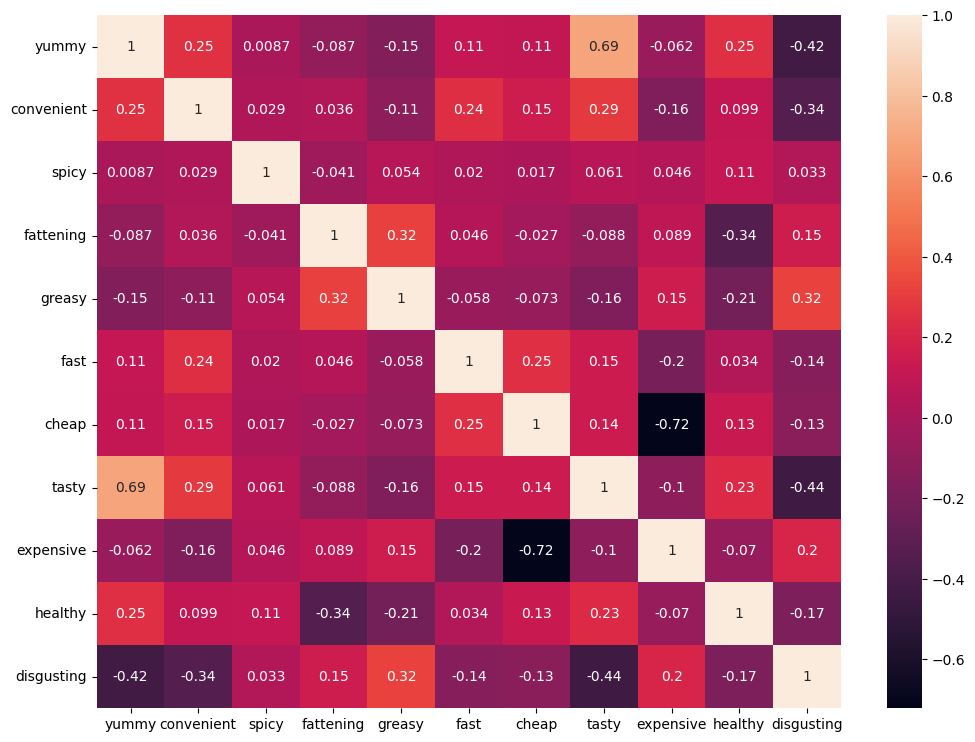

In [18]:
# heatmap fo correlation matrixs to get insight from data
plt.figure(figsize=(12,9))
sns.heatmap(mcdonalds_copy.corr(), annot=True)
plt.show()

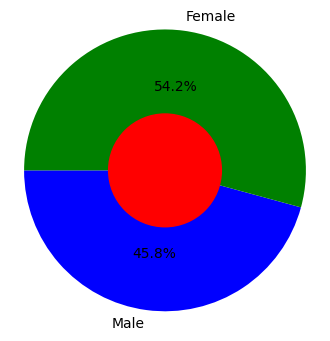

In [150]:
# pie chart of male and female percentages in dataset
labels = ['Male','Female']
sizes = [mcdonalds.query('Gender == "Male"').Gender.count(),mcdonalds.query('Gender == "Female"').Gender.count()]
colors = ['blue','green']
plt.figure(figsize=(4,4))
my_circle=plt.Circle((0,0), 0.4, color='red')
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=180)
p=plt.gcf()
plt.axis('equal')
p.gca().add_artist(my_circle)
plt.show()

###### -> females are more than males

##### Using ELBOW Method to get the most suitable value for cluseter

In [20]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [21]:
# performing K-means and evaluating the clustering results for a range of cluster numbers(from 1 to 9)
# we 
X = mcdonalds_copy.copy()
mapp = {}
cluster = range(1, 10)
t = []

for k in cluster:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    # t.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)))
    # This computes the sum of minimum distances for all data points to their nearest cluster centers
    mapp[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

In [22]:
# distances for each cluster
for key, val in mapp.items():
    print(f'{key} : {val}')

1 : 1.3566210503435796
2 : 1.1815545534885887
3 : 1.071330135305748
4 : 0.9975725713685007
5 : 0.940360908109191
6 : 0.9046420734191846
7 : 0.8472706078179031
8 : 0.8236905211968937
9 : 0.7847105427502604


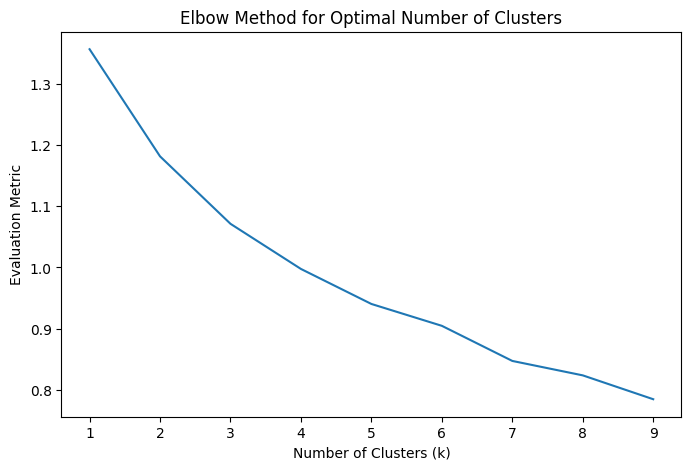

In [25]:
# plotting diagram to get the exact number of cluster in dataset
fig = plt.figure(figsize =(8, 5))
plt.plot(range(1, 10), mapp.values(), linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Evaluation Metric')
plt.title('Elbow Method for Optimal Number of Clusters')
# Show the plot
plt.show()

###### -> By above graph, We can say that the sharp edge of the elbow is at no. of cluster = 5. SO we take cluster = 5.

##### Using PCA so that we can easily visualize data for cluster = 5

In [27]:
# we will reduce the dimentions of data to visualize it properly
from sklearn.decomposition import PCA
from sklearn import preprocessing

# scaling the data for PCA and creating PCA 11 objects and fit the data to PCA model
pca_data = preprocessing.scale(X)
pca = PCA(n_components=11)
pc = pca.fit_transform(X)

# nameing the features and creating the new dataframe
col = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10','pca11']
pcadataframe = pd.DataFrame(data = pc, columns = col)
pcadataframe.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [37]:
# creating new dataframe to visualize using original features on each principal component from the PCA object and features
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PCA" + str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

# seting up indexes
loadings_df['variable'] = mcdonalds_copy.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


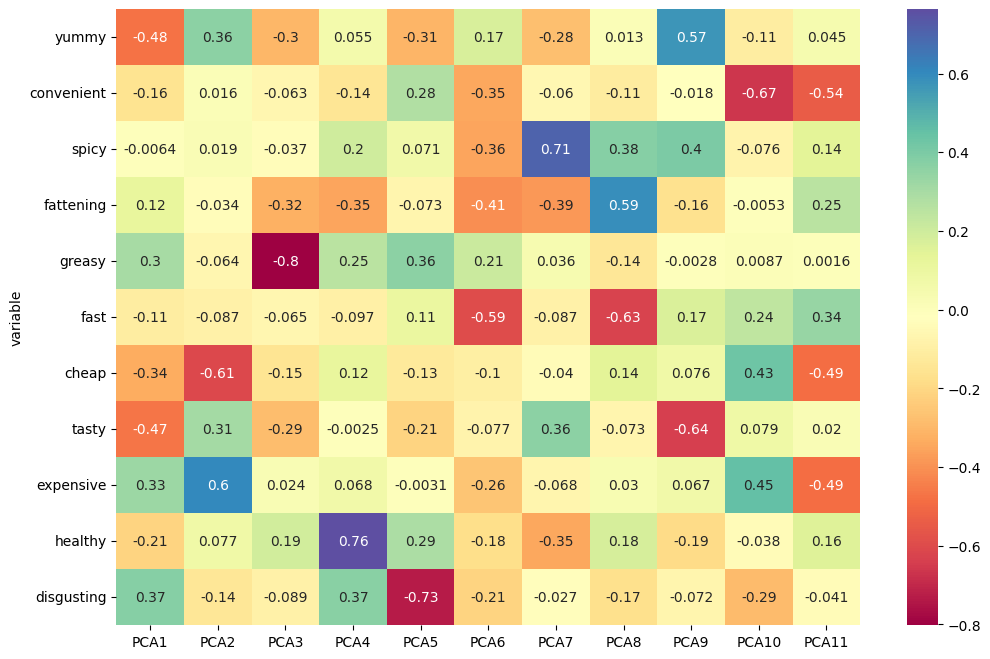

In [38]:
# creating heatmap of the pca dataset
plt.rcParams['figure.figsize'] = (12,8)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

In [49]:
print(pc[:, 0])
print(pc[:, 1])

[ 0.42536706 -0.21863768  0.37541475 ... -0.18589445 -1.18206441
  1.55024186]
[-0.21907878  0.38818996  0.73043507 ...  1.06266156 -0.03856977
  0.27503101]


c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


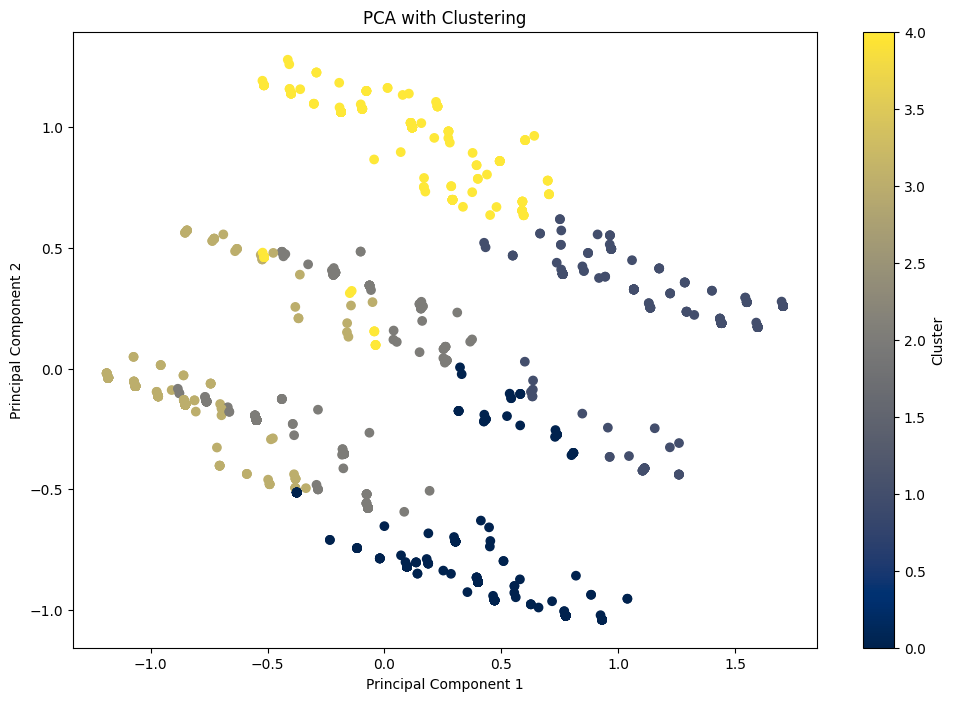

In [64]:
# create a K-means clustering model with 5 clusters and fitting the dataset
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(mcdonalds_copy)

# Plot the PCA results for first and second PC with different colors for each cluster
plt.scatter(pc[:, 0], pc[:, 1], c=clusters, cmap='cividis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA with Clustering')
plt.colorbar(label='Cluster')
plt.show()

##### Perfom Hierarchial Clustering

In [72]:
from sklearn.cluster import AgglomerativeClustering

c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


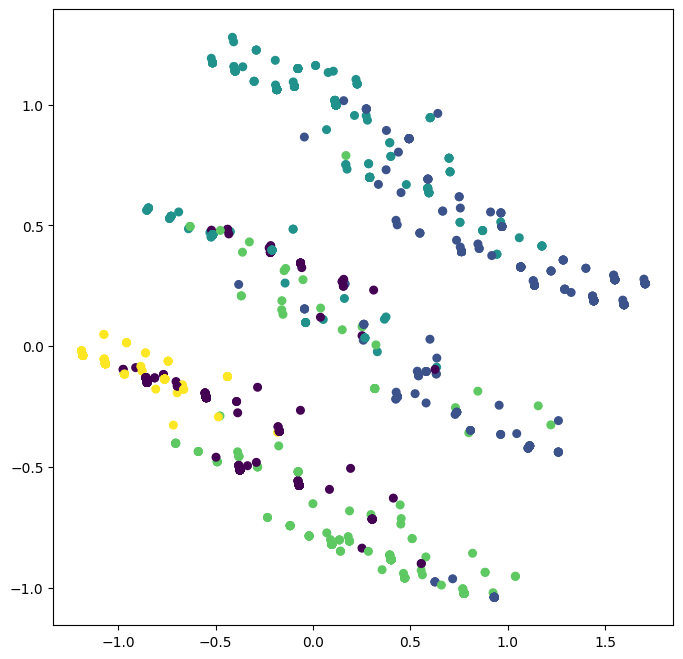

In [73]:
# Perform hierarchical clustering and then visualizing the results by creating a scatter plot of the first two principal components
hierarical_cluster = AgglomerativeClustering(n_clusters = 5, affinity= "euclidean")
data_predict = hierarical_cluster.fit_predict(mcdonalds_copy)
plt.figure(figsize=(8,8))
plt.scatter(pc[:, 0], pc[:, 1] , c = data_predict, s=30)
plt.show()

In [74]:
from scipy.cluster.hierarchy import linkage, dendrogram

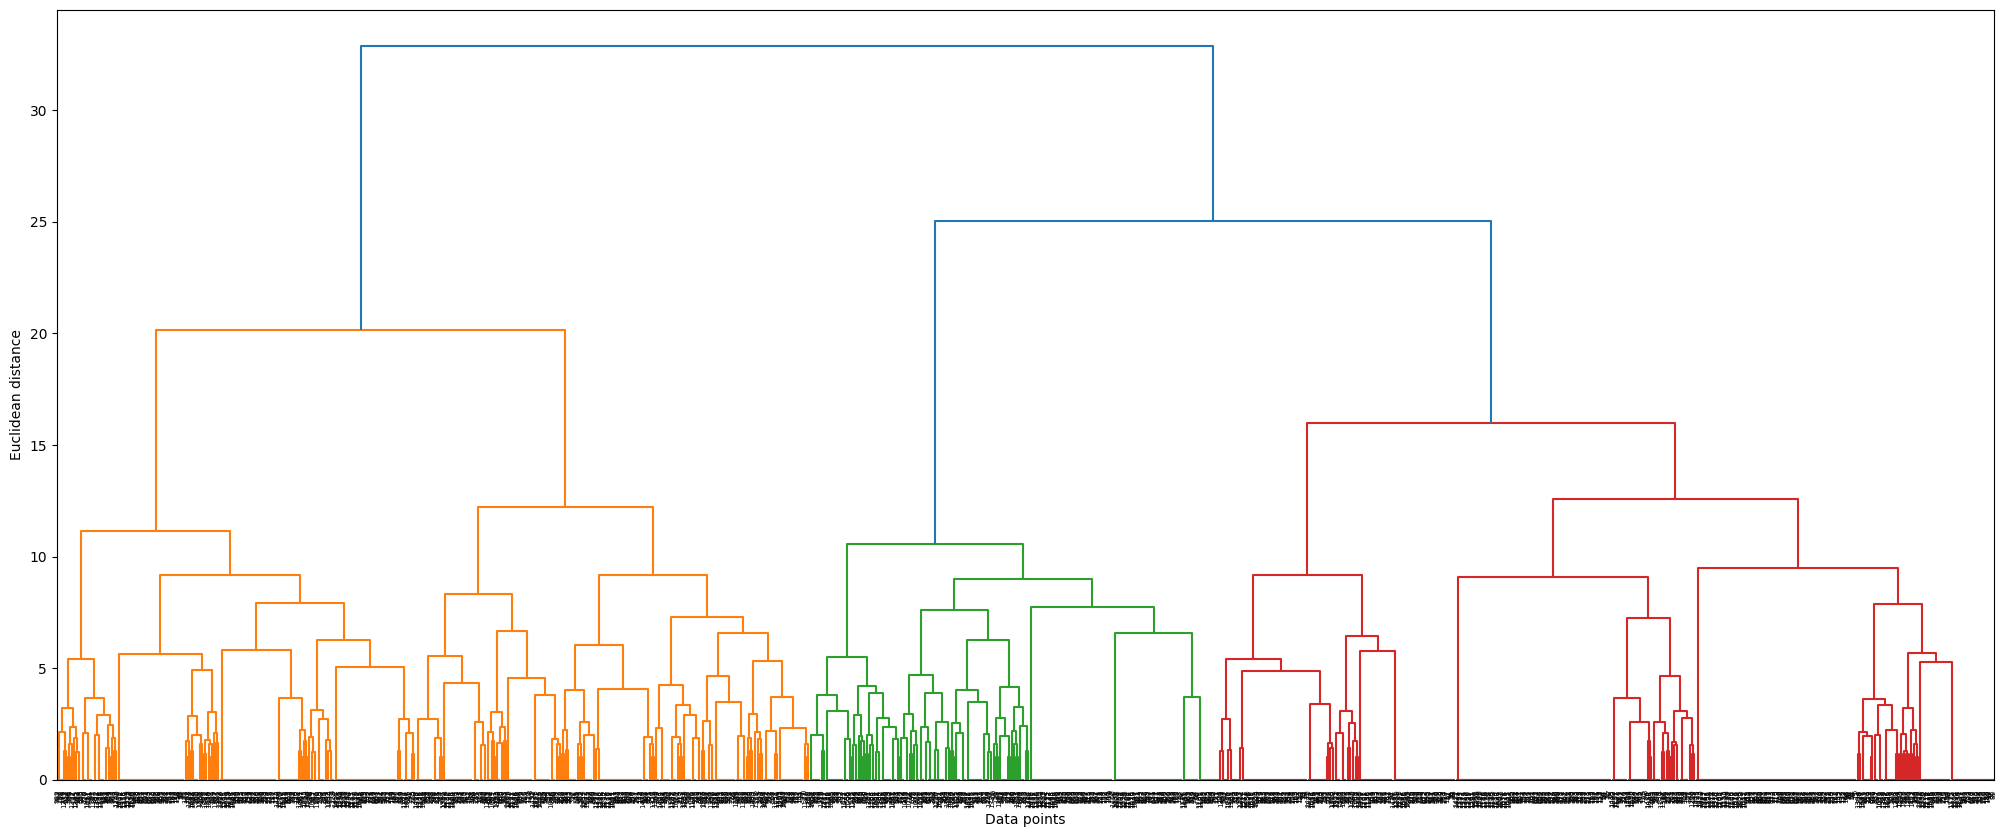

In [75]:
# Calculates the linkage matrix using Ward's method for hierarchical clustering
merge = linkage(mcdonalds_copy, method="ward")
plt.figure(figsize=(25,10))

# generates the dendrogram plot using the linkage matrix
dendrogram(merge)
plt.xlabel("Data points")
plt.ylabel("Euclidean distance")
plt.show()

##### VisitFrequency Columns

C:\Users\samee\AppData\Local\Temp\ipykernel_1804\2932043676.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age", data=mcdonalds, orient="v", height=5, aspect=2.2, palette="Set1", kind="swarm")
c:\Users\samee\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


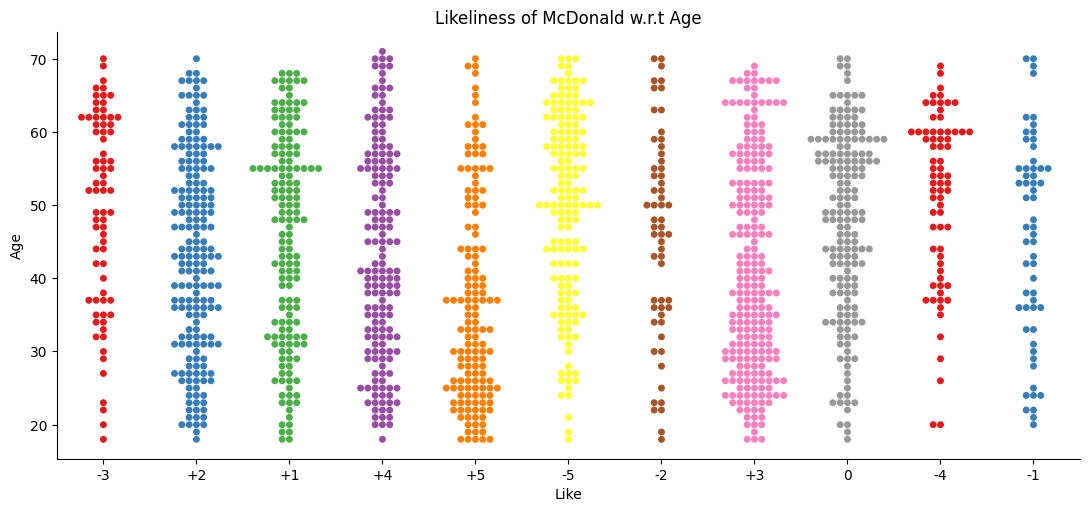

In [93]:
mcdonalds['Like']= mcdonalds['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})

sns.catplot(x="Like", y="Age", data=mcdonalds, orient="v", height=5, aspect=2.2, palette="Set1", kind="swarm")
plt.title('Likeliness of McDonald w.r.t Age')
plt.show()

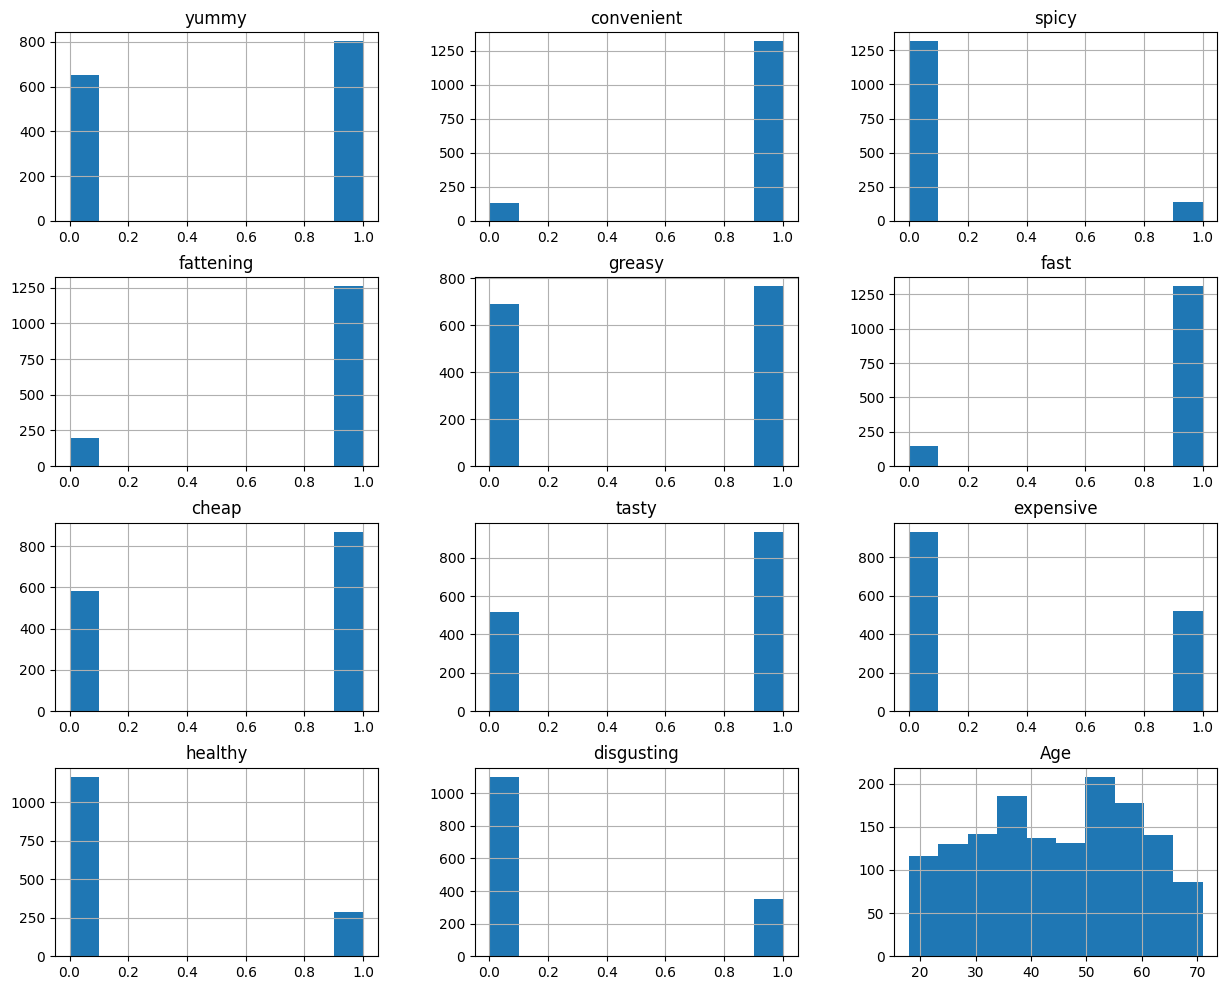

In [95]:
plt.rcParams['figure.figsize'] = (15,12)
mcdonalds.hist()
plt.show()

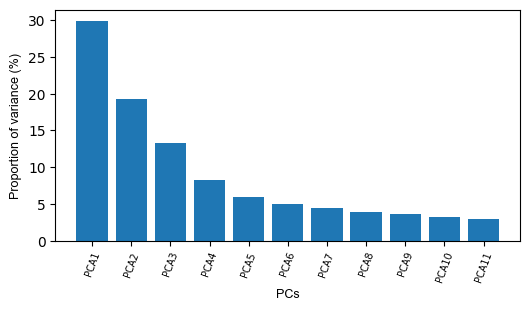

In [99]:
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_], show=True, dim=(6,3))

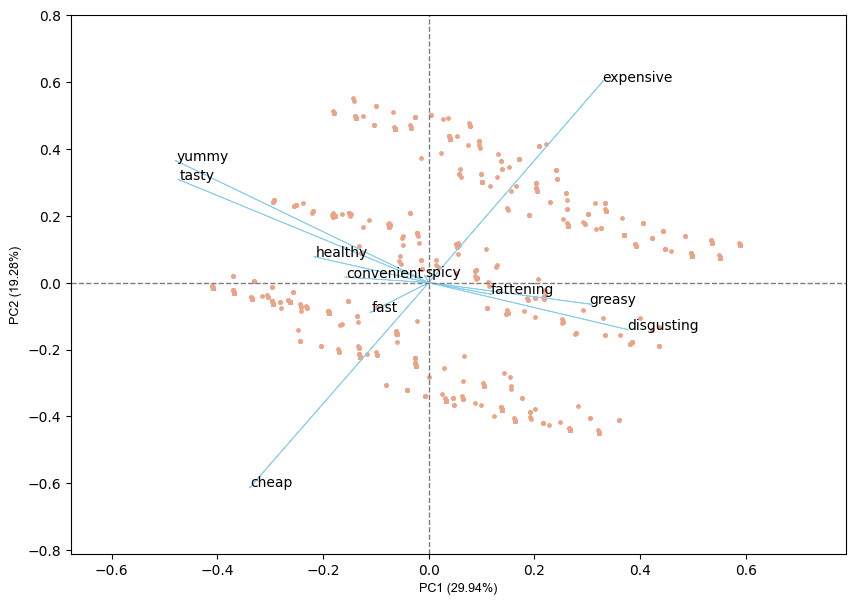

In [101]:
# create a biplot visualization PCA results
pca_scores = PCA().fit_transform(mcdonalds_copy)
cluster.biplot(cscore = pca_scores, loadings=loadings, labels = mcdonalds.columns.values, 
               var1 = round(pca.explained_variance_ratio_[0]*100, 2), var2 = round(pca.explained_variance_ratio_[1]*100, 2),
               show = True,dim = (10,7))

In [107]:
# adding cluster number features in dataset for visualization
mcdonalds['No_Cluster'] = kmeans.labels_

In [108]:
mcdonalds.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,No_Cluster
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,0
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,2
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,4
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,2
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,0


In [110]:
from statsmodels.graphics.mosaicplot import mosaic

# getting the overview relation between like range(-5, +5) and cluster using mosaic plot
crosstab =pd.crosstab(mcdonalds['No_Cluster'],mcdonalds['Like'])
crosstab = crosstab[['-5','-4','-3','-2','-1','0','+1','+2','+3','+4','+5']]
crosstab

Like,-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5
No_Cluster,,,,,,,,,,,
0,59,37,33,27,22,54,32,33,16,2,0
1,85,26,28,16,12,35,14,7,8,0,0
2,3,3,4,8,16,28,39,52,49,48,43
3,1,2,2,2,2,24,32,44,91,67,65
4,4,3,6,6,6,28,35,51,65,43,35


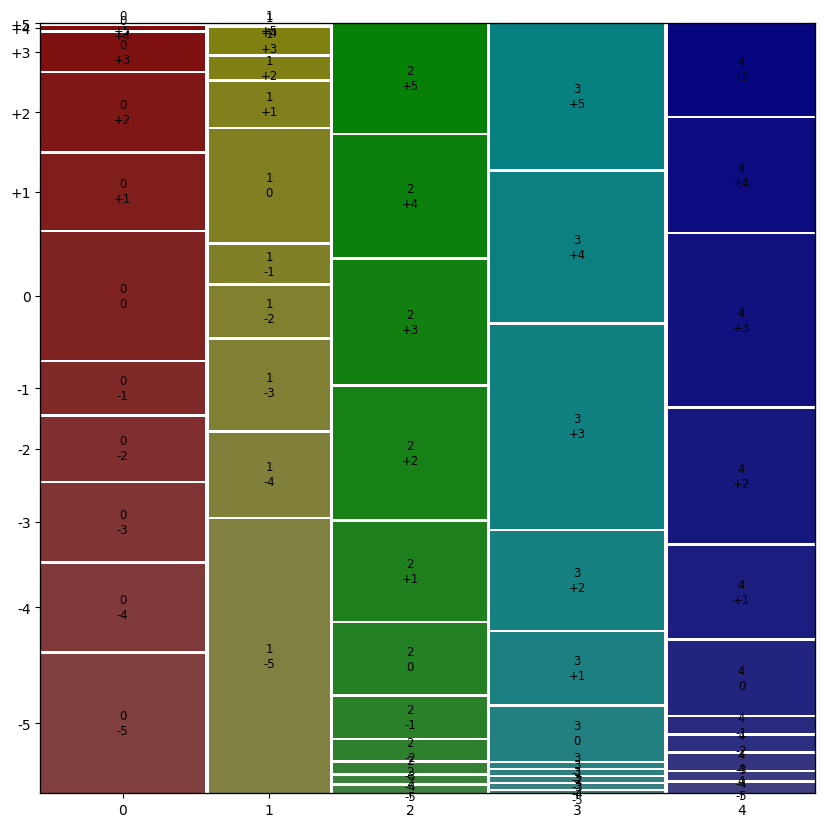

In [113]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(crosstab.stack())
plt.show()

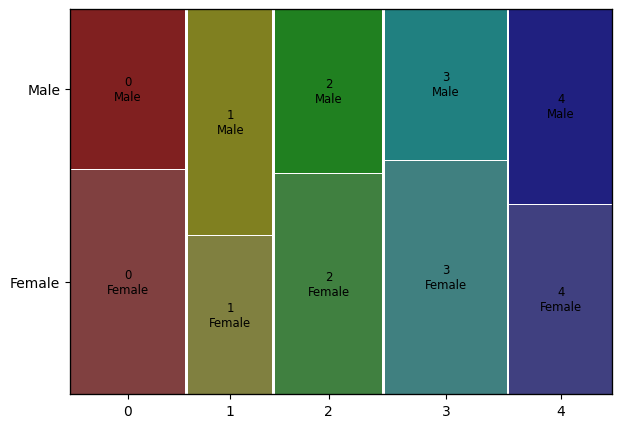

In [114]:
# getting the overview, relation between gender and cluster using mosaic plot
crosstab_gender =pd.crosstab(mcdonalds['No_Cluster'],mcdonalds['Gender'])
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='No_Cluster', ylabel='Age'>

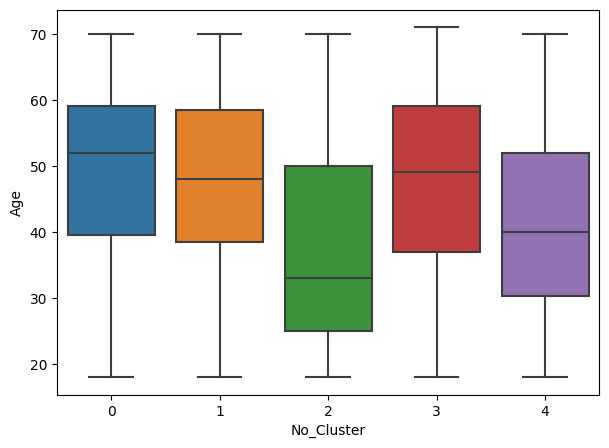

In [115]:
# relation between age and cluster using boxplot
sns.boxplot(x="No_Cluster", y="Age", data=mcdonalds)

In [119]:
# relation between gender and cluster
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('No_Cluster')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,No_Cluster,Gender
0,0,0.415873
1,1,0.588745
2,2,0.426621
3,3,0.391566
4,4,0.507092


In [117]:
# relation between likes and cluster using mosaic plot
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('No_Cluster')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,No_Cluster,Like
0,0,6.161905
1,1,7.350649
2,2,3.252560
3,3,2.975904
4,4,3.184397


In [123]:
# relation between VisitFrequency and cluster using mosaic plot
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('No_Cluster')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,No_Cluster,VisitFrequency
0,0,2.704762
1,1,2.692641
2,2,2.645051
3,3,2.590361
4,4,2.567376


In [121]:
# relation between VisitFrequency, cluster, Like
segment = Gender.merge(Like, on='No_Cluster', how='left').merge(visit, on='No_Cluster', how='left')
segment

,No_Cluster,Gender,Like,VisitFrequency
0,0,0.415873,6.161905,2.704762
1,1,0.588745,7.350649,2.692641
2,2,0.426621,3.252560,2.645051
3,3,0.391566,2.975904,2.590361
4,4,0.507092,3.184397,2.567376


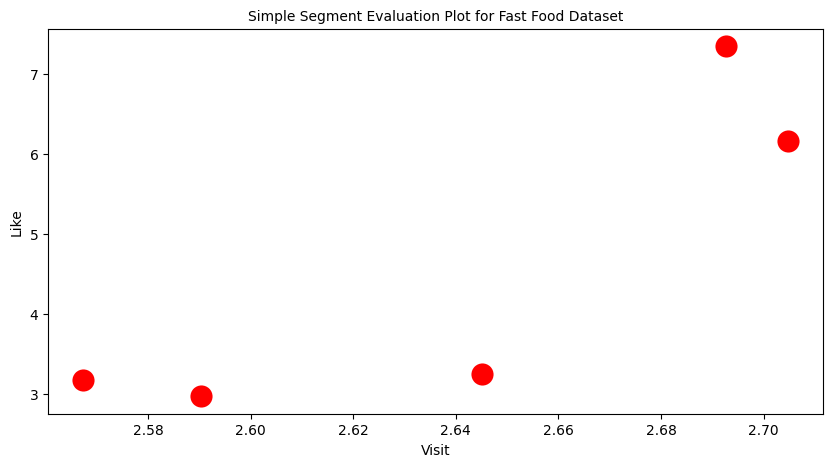

In [135]:
# Final segment

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like", data=segment, s=300, color="red")
plt.title("Simple Segment Evaluation Plot for Fast Food Dataset", fontsize = 10)
plt.xlabel("Visit", fontsize = 10)
plt.ylabel("Like", fontsize = 10)
plt.show()